In [25]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

In [26]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e4, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
150e-7
);

T = 300;

In [27]:
Conduction.kp(semiconductor, T)

3.651286909048324e19

The overall thermal conductivity is way to high.

In [28]:
range = (150:50:10000) .* 10^-7;

function k(L)
    semiconductor.omega_min = (L)^(-1/4);
    return Conduction.kp(semiconductor, T)
end
res = k.(range);

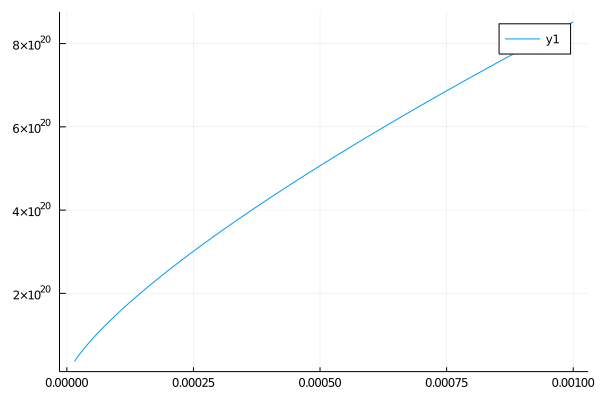

In [29]:
plot(range, res)

Even though the result depends on the layer thickness $L$, it has a minor influence on it.

First, I will investigate the influence of a upper limit to our model.

In [30]:
semiconductor.omega_min = 150e-7^(-1/4)

kp_higher_limit(semiconductor, T, x) = Conduction.k * T * quadgk(
    r -> Conduction.DOSp(semiconductor, r, T) * Conduction.C(r, T) * Conduction.Dp(semiconductor, r, T),
    semiconductor.omega_min * Conduction.hbar / (Conduction.k * T),
    x
)[1]

kp_higher_limit (generic function with 1 method)

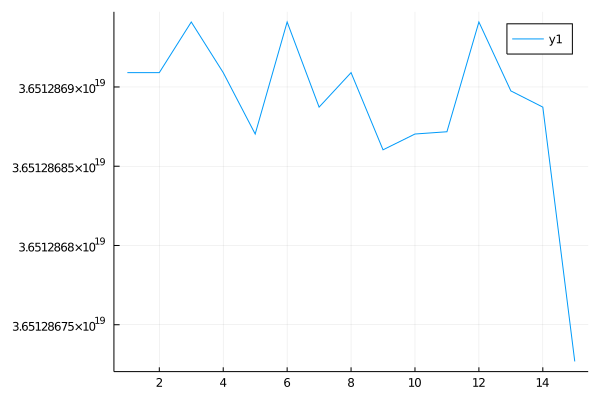

In [31]:
range_x = 1:1:15;

res = (r -> kp_higher_limit(semiconductor, T, r)).(range_x);

plot(range_x, res)

The variations are clearly due to a lack of precision during the computation, but the general value is not affected my high upper limit.

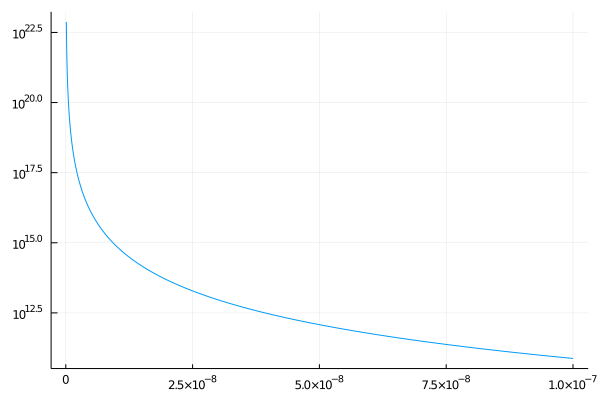

In [79]:
f(semiconductor, U, T) = Conduction.k * T * Conduction.DOSp(semiconductor, U, T) * Conduction.C(U, T) * Conduction.Dp(semiconductor, U, T);

range = (1:1:1000) .* 10^(-10);
res = (r -> f(semiconductor, r, T)).(range);
plot(range, res, yaxis=:log, label="")



From the log plot of the value of the $k_BT g^\prime C D_p$, we see that it diverges to the infinite in $0$ and that the value of $\omega_{min} \sim 10^{-13}$ is way too low.

In [33]:
semiconductor.omega_min * Conduction.hbar / (Conduction.k * T)

4.093106123651691e-13

Now we will investigate such influence of the lower limit.

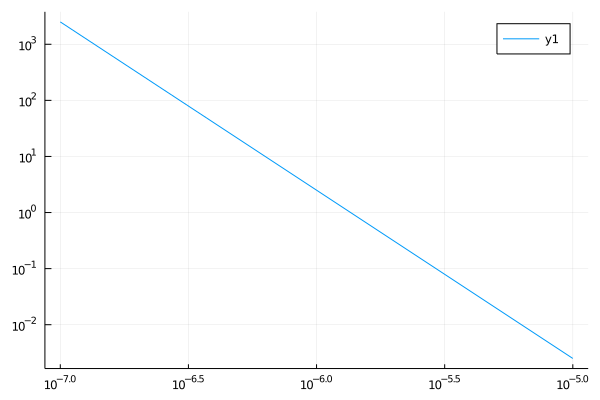

In [71]:
kp_lower_limit(semiconductor, T, x) =  quadgk(
    r -> Conduction.k * T * Conduction.DOSp(semiconductor, r, T) * Conduction.C(r, T) * Conduction.Dp(semiconductor, r, T),
    x,
    +Inf
)[1]

range = (1:0.1:100)*10^-7;
res = (r -> kp_lower_limit(semiconductor, T, r)).(range);

plot(range, res, yaxis=:log, xaxis=:log)

Reasonable values of $k_p$ are obtained for a lower limite of around $10^{-6}$.

The $kp$ dependance on $\omega_{min}$ is of the form $bx^{-a}$.

In [66]:
b = log(f(x2)) + a * log(x2)

-40.52866732649569

In [69]:
f(r) = kp_lower_limit(semiconductor, T, r);
x1 = 1e-6;
x2 = 1e-5;
a = log(f(x1) / f(x2)) / (log(x2 / x1))

2.9999969819198165